# Case 2. Diabetic Retinopathy Analysis
Joona Klemetti   
22.2.2018   
Cognitive Systems for Health Technology Applications   
Helsinki Metropolia University of Applied Science   

# 1. Objectives   
The aim of this case is learn to use convolutional neural networks to classify medical images. Purpose of the case is use keras.io convolutional neural networks to create a classifier for diabetic retinopathy images.

After the concolutional neural network and the expert system is made it's intended to examine how number of nodes, layers and epochs affects to systems reliability. Also it's tested how batch size and train-validation-test distribution affects the results.

# 2. Required libraries   
At first it is necessary to import all libraries. In this assignment is used numpy to scientific computing and creating multidimensional arrays, matplotlib to ploting figures, time to calculate time,  scikit-learn to calculate metrics, keras to build the convolutional neural network and pickle to save history of the model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import keras 
import time
from keras import layers
from keras import models
import pickle

%matplotlib inline

Using TensorFlow backend.


# 3. Building network   
The convolutional neural network is build by using keras sequential model. The architecture is inspired by The KaggleDiabetic Retinopathy Detection competition 2015 winnner team Min-Pooling. Team member Ben Graham describes their model in competition report. Unfortunately my laptop isn't quite as good as NVIDIA GPU used by Team Min-Pooling. That's is the biggest reason I couldn't build as massive network. For more information of Team Min-Poolings model it is recommended to explore original report https://kaggle2.blob.core.windows.net/forum-message-attachments/88655/2795/competitionreport.pdf   
<br>
It's choosed to use keras 2D convolution layers and keras MaxPooling2D leyers following each other. In the end there is used Flatten layer to flattens the input, Dropout layer for weight regularization to avoid overfitting and couple of Dense leyers.

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 256)       295168    
__________

In [3]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

# 4. Data prosessing   
Dataset is prosessed by using keras library. First it's splitted to train, validation and test sets. After that pictures needs to be preprosessed. The Pictures must be fed into the network in suitable-sized batches of 3D NumPy tensors. This is done by using ImageDataGenerator from keras.preprocessing.image.   
<br>
Training set is also augmented. It's choosed to accept horizontal flip, zoom range maxium in 20% and filling mode is choosed 'nearest'. That means if there are generated empty pixels in prosessing generator chooses pixel value from nearest pixel that got value. All sets are also rescaled by 1./255.   
<br>
Batch size is determined to be small enough to my computer but still big enough for efficient.

In [4]:
from keras.preprocessing.image import ImageDataGenerator

train_dir = 'dataset2\\train'
validation_dir = 'dataset2\\validation'
test_dir = 'dataset2\\test'
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   zoom_range=0.2,
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=50,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size = (150, 150),
        batch_size = 50,
        class_mode = 'binary')

Found 1237 images belonging to 2 classes.
Found 413 images belonging to 2 classes.
Found 413 images belonging to 2 classes.


# 5. Training and Validation
steps_per_epoch defines total number of steps before declaring one epoch finished and starting the next epoch. Number 25 is determined simply divide total number of pictures in training set by number of batch size. In this case 1237 / 50 = 24.74  ~25. Validation_steps is determined by the same principle. Time function is used to calculate elapsed time. Finally the model and history is saved.

In [7]:
t1 = time.time()

history = model.fit_generator(
      train_generator,
      steps_per_epoch=25,
      verbose = 1,
      epochs=50,
      validation_data=validation_generator,
      validation_steps=10)

t2 = time.time()

# Saves the model and history
model.save('case_2_run_2.h5')
pickle.dump(history.history, open('case_2_history_1.p', 'wb'))

Epoch 1/50
25/25 [==============================] - 471s 19s/step - loss: 0.5753 - acc: 0.6974 - val_loss: 0.5397 - val_acc: 0.7106
Epoch 2/50
25/25 [==============================] - 362s 14s/step - loss: 0.5354 - acc: 0.7185 - val_loss: 0.5183 - val_acc: 0.7257
Epoch 3/50
25/25 [==============================] - 349s 14s/step - loss: 0.5327 - acc: 0.7257 - val_loss: 0.5246 - val_acc: 0.7538
Epoch 4/50
25/25 [==============================] - 356s 14s/step - loss: 0.5294 - acc: 0.7367 - val_loss: 0.5040 - val_acc: 0.7624
Epoch 5/50
25/25 [==============================] - 351s 14s/step - loss: 0.5237 - acc: 0.7519 - val_loss: 0.5020 - val_acc: 0.7516
Epoch 6/50
25/25 [==============================] - 351s 14s/step - loss: 0.5205 - acc: 0.7428 - val_loss: 0.4853 - val_acc: 0.7581
Epoch 7/50
25/25 [==============================] - 347s 14s/step - loss: 0.5055 - acc: 0.7553 - val_loss: 0.4870 - val_acc: 0.7516
Epoch 8/50
25/25 [==============================] - 351s 14s/step - loss: 0.

In [8]:
print('Elapsed time {:.2f} hours.'.format((t2-t1)/3600))
print('Time per epoch {:.2f} minutes.'.format((t2-t1)/50/60))

Elapsed time 4.89 hours.
Time per epoch 5.87 minutes.


# Testing the model
Model is tested with testing set. Evaluate_generator() computes testing sets loss function and accuracity.

In [10]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

r = model.evaluate_generator(test_generator, steps = 21)

# Loss and accuracy
r

Found 413 images belonging to 2 classes.


[0.59182779207116076, 0.72380953743344256]

# 7. Results and Discussion
In the testing of convolutional neural network it is noticed light overfitting. It could be seen from lower testing accuracy and higher loss. Accuracy stays under 0.8 all the time. The final accuracy in testing was 0.7238. Loss functions diffrence between training and testing was bigger than differnece in accuracy. The final loss function was 0.5918 in testing when in the end of traing it was only 0.4507. Loss function decreased from first epoch to the 25th epoch. After 25th epoch loss function gets wierd variation. Behaviour of the loss function requires further investigation.   

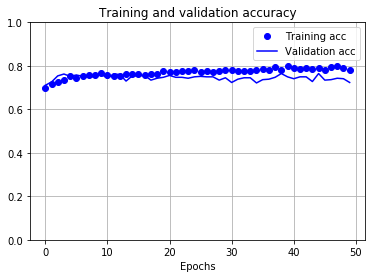

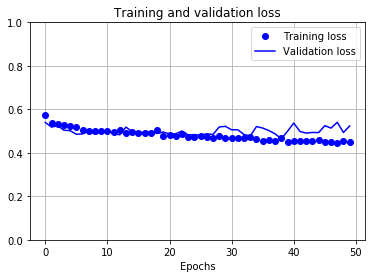

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylim([0, 1])
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylim([0, 1])
plt.xlabel('Epochs')
plt.grid()
plt.legend()  


plt.show()

# 8. Conclusions
The case 2. was very good introduction to the convolutional neural networks. I think the difficulty level was just right at this point. The objectives were achieved such the convolutional neural network works.   
<br>
There was a little variation of loss function after 25th epoch. After investigation overfitting was the most common answer. Actually it was only suggestion that I could find in this time. The attempts were made to reduce overfitting with regularization layers. However all the overfitting never vanish. I think this was best result to get when used dropout layers. Two Dropout layers works better than only one. It seems to be pointles to increase dropout 20% to 30% or 50%.   
<br>
Image prosessing didn't seem to help get any better results. Dataset consist only lightly over 1000 pictures. That seems too few to train convolutional neural network. With larger dataset it's possible to get much better results.   
<br>
72% accuracy isn't that good for binary classification. That means the model is right under three times out of four which isn't enough for medical classifier. Testing accuracy was at best 80%. If overfitting is gotten under of control model could be pretty good. 